In [1]:
from contextlib import closing
import io
import numpy
from copy import deepcopy

from matplotlib import pyplot
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import (
    Activation,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    Input,
    InputLayer,
    MaxPooling2D,
)
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist


2025-01-22 08:06:04.457634: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# ---------- Prepare data section ---------- #
# load mnist dataset
# x_train, y_train - training dataset and validation vector
# x_test, y_test - validation dataset and validation vector
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# make a deep copy to render data
render_x = deepcopy(x_train)
render_y = deepcopy(y_train)

# declare num of training samples
num_labels = len(numpy.unique(y_train))

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

# convert a single list to categorical list of lists
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

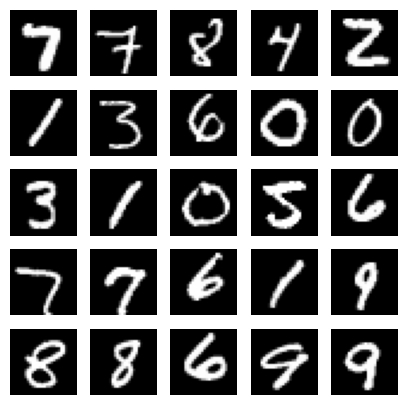

In [3]:
# ----------- Show sample section ---------- #
indexes = numpy.random.randint(0, render_x.shape[0], size=25)
images = render_x[indexes]
labels = render_y[indexes]
# plot the 25 mnist digits
pyplot.figure(figsize=(5,5))
for i in range(len(indexes)):
    pyplot.subplot(5, 5, i + 1)
    image = images[i]
    pyplot.imshow(image, cmap='gray')
    pyplot.axis('off')
pyplot.savefig('samples.png')
pyplot.show()
pyplot.close('all')

In [4]:
# network parameters
BATCH_SIZE = 64
HIDDEN_UNITS = 128
DROPOUT = 0.2
KERNEL_SIZE = 3
POOL_SIZE = 2
FILTERS = 64
EPOCHS = 20
input_shape = (image_size, image_size, 1)

def build_model(units=HIDDEN_UNITS, dropout=DROPOUT, input_size=input_size,
                num_labels=num_labels, kernel_size=KERNEL_SIZE, pool_size=POOL_SIZE,
                filters=FILTERS):
    inputs = Input(shape=input_shape)
    layer = Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')(inputs)
    layer = MaxPooling2D()(layer)
    layer = Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')(layer)
    layer = MaxPooling2D()(layer)
    layer = Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')(layer)
    # image to vector before connecting to dense layer
    layer = Flatten()(layer)
    # dropout regularization
    layer = Dropout(dropout)(layer)
    outputs = Dense(num_labels, activation='softmax')(layer)
    # build the model by supplying inputs/outputs
    model = Model(inputs=inputs, outputs=outputs)
    return model


model = build_model()

# close file handler at the end of context execution
with closing(io.StringIO()) as fh:
    model.summary(print_fn=lambda x: fh.write(x + "\n"))
    summary_str = fh.getvalue()

# set up image representation
pyplot.figure(figsize=(12, 6))
pyplot.text(0, 1, summary_str, fontsize=12, family='monospace', va='top')
pyplot.axis('off')
# save as PNG
pyplot.savefig('model-summary.png', bbox_inches='tight')
pyplot.close()

2025-01-22 08:06:08.468880: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-22 08:06:08.475427: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-22 08:06:08.475743: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
# model = load_model('model.keras')

In [6]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=0)
model.save('model.keras')

Epoch 1/20


2025-01-22 08:06:11.589179: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2025-01-22 08:06:11.897977: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x73b67002dad0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-01-22 08:06:11.898020: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-01-22 08:06:11.903848: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-22 08:06:12.022883: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


938/938 [==============================] - 5s 4ms/step - loss: 0.3548 - accuracy: 0.9190
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0790 - accuracy: 0.9766
Epoch 3/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0589 - accuracy: 0.9817
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0507 - accuracy: 0.9841
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0396 - accuracy: 0.9879
Epoch 6/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0394 - accuracy: 0.9874
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0343 - accuracy: 0.9894
Epoch 8/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0308 - accuracy: 0.9901
Epoch 9/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0306 - accuracy: 0.9904
Epoch 10/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0307 - accuracy: 0.9901
Epoch 11/2

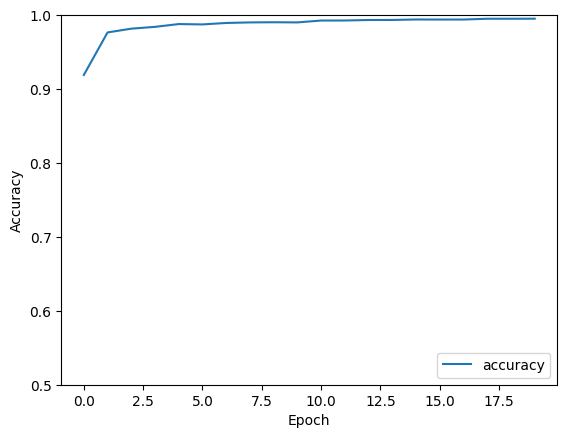

313/313 - 1s - loss: 0.0545 - accuracy: 0.9918 - 513ms/epoch - 2ms/step
Final model accuracy: 99.180%


In [7]:
pyplot.plot(history.history['accuracy'], label='accuracy')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.ylim([0.5, 1])
pyplot.legend(loc='lower right')
pyplot.savefig("accuracy-history.png")
pyplot.show()
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Final model accuracy: {test_acc*100:.3f}%", )